# 5_7

In [1]:
# This file is associated with the book
# "Machine Learning Refined", Cambridge University Press, 2016.
# by Jeremy Watt, Reza Borhani, and Aggelos Katsaggelos.

import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from __future__ import division
import pylab

First a simple data loading function.

In [2]:
# load data
def load_data():
    data = np.array(np.genfromtxt('noisy_sin_samples.csv', delimiter=','))
    x = np.reshape(data[:,0],(np.size(data[:,0]),1))
    y = np.reshape(data[:,1],(np.size(data[:,1]),1))
    return x,y

Now we need a function to transform input features into Fourier features.

In [3]:
#YOUR CODE GOES HERE takes poly features of the input 

def poly_features(x,D):
    F = []

    for i in x:
        f_col = []
        for j in range(1 , D + 1):
            f_col.append(i ** j)
        F.append(f_col)
    F = np.array(F)
    F.shape = (len(x),D)
    F = F.T
    
    return F


Now we need a variety of plotting functions - to plot our datapoints, polynomial models, and errors.

In [4]:
# plot the polynomial  
def plot_model(w,D):
    # plot determined surface in 3d space
    s = np.arange(0,1,.01)
    f = poly_features(s,D)
    z = np.dot(f.T,w)

    # plot contour in original space
    plt.plot(s,z, color = 'r', linewidth = 2)
    plt.ylim([-1.5,1.5])
    plt.xlim([0,1])

# plot mse's over all D tested 
def plot_mse(mses,deg):
    plt.plot(np.arange(1,np.size(mses)+1),mses,'ro--')
    plt.title('MSE on entire dataset in D', fontsize=18)
    plt.xlabel('degree D', fontsize=18)
    plt.ylabel('MSE       ', fontsize=18)

# plot data 
def plot_data(x,y,deg):
    for i in np.arange(1,7):
        plt.subplot(2,3,i)
        plt.scatter(x,y,s = 30, color = 'k')

        # graph info labels
        s = 'D = ' + str(deg[i-1])
        plt.title(s, fontsize=15)
        plt.axis('off')

Now, a function to loop through the degrees we wish to test and trains a model for each, plotting the resulting fit to the dataset and error.

In [5]:
# run over all the degrees, fit each models, and calculate errors
def try_all_degs(x,y,deg_range):
    # plot datapoints - one panel for each deg in deg_range
    fig = plt.figure(figsize = (8,4))
    plot_data(x,y,deg_range)

    # generate nonlinear features
    mses = []

    for D in np.arange(0,np.size(deg_range)):
        # generate poly feature transformation
        F = poly_features(x,deg_range[D])
        # get weights for current model
        temp = np.linalg.pinv(np.dot(F,F.T))
        w = np.dot(np.dot(temp,F),y)
        MSE = np.linalg.norm(np.dot(F.T,w)-y)/np.size(y)
        mses.append(MSE)

        # plot fit to data
        plt.subplot(2,3,D+1)
        plot_model(w,deg_range[D])

    # make plot of mse's
    fig = plt.figure(figsize = (5,5))
    plot_mse(mses,deg_range)
    plt.show()

Now that everything is defined, lets run all.

/Library/Python/2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


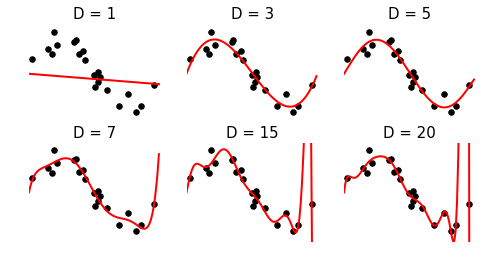

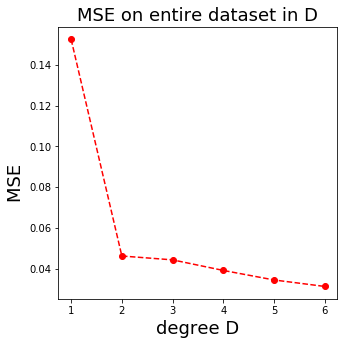

In [6]:
# load data and defined degree range
x, y = load_data()
deg_range = [1,3,5,7,15,20]           # degree polys to try

# run all over degree range
try_all_degs(x,y,deg_range)

# 5_11

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import csv

def read_data(filename):
    '''
    Read data from csvfile
    Parameters:
    ----------------------------------------------------
    filename: path to data file
    Returns:
    ----------------------------------------------------
    X: ndarray of shape (1, P)
    y: ndarray of shape (P, 1)

    Hints:
    ----------------------------------------------------
    Make sure the shapes of X, y conform to above. You may
    find "np.genfromtxt(, delimiter=','), np.newaxis" useful
    '''
    ####################################################
    ###                  Your Code                   ###
    ####################################################
    reader = csv.reader(open(filename, "r"), delimiter = ",")
    d = list(reader)
    data = np.array(d).astype("float")
    X = data[:,0];
    y = data[:,1];
    X.shape = (1, len(X))
    y.shape = (len(y), 1)
    ####################################################
    ###                    End                       ###
    ####################################################
    assert X.shape == (1, data[:, 0].size), "Shape of X incorrect"
    assert y.shape == (data[:,-1].size, 1), "Shape of y incorrect"
    return X, y

def fourier_basis(X, D):
    '''
    Return Fourier basis for X (with ONE bias dimension)
    Parameters:
    ----------------------------------------------------
    X: data ndarray of shape (1, P)
    D: degree of Fourier basis features
    Returns:
    ----------------------------------------------------
    F: ndarray of shape (2D+1, P)

    Hints:
    ----------------------------------------------------
    Make sure the shapes of F conform to above. You may
    find "np.arange, np.reshape, np.concatenate(, axis=0),
    np.ones, np.cos, np.sin"  useful
    '''	
    ####################################################
    ###                  Your Code                   ###
    ####################################################
    f = np.ones((1, X.size))
    m = np.arange(1, D + 1).reshape(D, 1)
    w = 2 * np.pi * np.dot(m, X) 
    F_1 = np.cos(w)
    F_2 = np.sin(w)

    F = np.concatenate((f, F_1, F_2), axis = 0)
    ####################################################
    ###                    End                       ###
    ####################################################
    assert F.shape == (2*D+1, X.size), "Shape of F incorrect"
    return F

def poly_basis(X, D):
    '''
    Return polynomial basis for X (with ONE bias dimension)
    Parameters:
    ----------------------------------------------------
    X: data ndarray of shape (1, P)
    D: degree of Fourier basis features
    Returns:
    ----------------------------------------------------
    F: ndarray of shape (D+1, P)

    Hints:
    ----------------------------------------------------
    Make sure the shapes of F conform to above. You may
    find "np.arange, np.reshape, np.power"  useful
    '''	
    ####################################################
    ###                  Your Code                   ###
    ####################################################
    f = np.ones((1, X.size))
    m = np.arange(1, D + 1).reshape(D, 1)
    y = np.power(X, m)
    # for d in range(1,D+1):
    # 	F = np.concatenate((F,np.power(X,d)), axis = 0)
    # F.shape = (D + 1, X.size)
    F = np.concatenate((f, y), axis = 0)
    ####################################################
    ###                    End                       ###
    ####################################################
    assert F.shape == (D+1, X.size), "Shape of F incorrect"
    return F

def least_square_sol(F, y):
    '''
    Refer to eq. 5.19 in the text
    Parameters:
    ----------------------------------------------------
    F: ndarray of shape (2D+1 or D+1 depends on what basis, P)
    y: ndarray of shape (P, 1)
    Returns:
    ----------------------------------------------------
    w: learned weighter vector of shape (2D+1, 1)

    Hints:
    ----------------------------------------------------
    You may find "np.linalg.pinv, np.dot"  useful
    '''	
    ####################################################
    ###                  Your Code                   ###
    ####################################################
    w = np.dot(np.linalg.pinv(np.dot(F, F.T)), np.dot(F,y))

    ####################################################
    ###                    End                       ###
    ####################################################
    assert w.shape == (F.shape[0], 1), "Shape of w incorrect"
    return w

def mean_square_error(w, F, y):
    '''
    Refer to eq. 5.19 in the text
    Parameters:
    ----------------------------------------------------
    w: learned weighter vector of shape (2D+1, 1)
    F: ndarray of shape (2D+1, P)
    y: ndarray of shape (P, 1)
    Returns:
    ----------------------------------------------------
    mse: a scaler, mean square error of your learned model

    Hints:
    ----------------------------------------------------
    You may find "np.dot, np.mean"  useful
    '''	
    ####################################################
    ###                  Your Code                   ###
    ####################################################
    mse = np.mean(np.dot((np.dot(F.T, w) - y).T, (np.dot(F.T, w) - y)))

    # temp = np.power(np.dot(F.T,w) - y, 2)
    # mse = np.mean(temp)

    ####################################################
    ###                    End                       ###
    ####################################################
    return mse

def random_split(P, K):
    '''
    Return a list of K arrays, each of which are indices 
    of data point

    Parameters:
    ----------------------------------------------------
    P: number of data points
    K: number of folds
    Returns:
    ----------------------------------------------------
    folds: a list of K arrays, each of which are position 
    indices of data point

    Hints:
    ----------------------------------------------------
    You may find "np.split, np.random.permutation, np.arange" 
    useful	
    '''
    ####################################################
    ###                  Your Code                   ###
    ####################################################
    folds = np.arange(P)
    folds = np.random.permutation(folds)
    folds = np.split(folds, K)

    ####################################################
    ###                    End                       ###
    ####################################################
    assert len(folds) == K, 'Number of folds incorrect'
    return folds

def train_val_split(X, y, folds, fold_id):
    '''
    Split the data into training and validation sets
    Parameters:
    ----------------------------------------------------
    X: ndarray of shape (1, P)
    y: ndarray of shape (P, 1)
    folds: a list of K arrays, each of which are indices 
    of data point
    fold_id: the id of the fold you want to be validation set
    Returns:
    ----------------------------------------------------
    X_train: training set of X
    y_train: training label
    X_val: validation set of X
    y_val: validation label
    '''
    ####################################################
    ###                  Your Code                   ###
    ####################################################
    X_val = X.iloc[folds[fold_id]]
    X_val = X_val.values
    X_val.shape = (1, X_val.size)
    y_val = y[folds[fold_id]]
    y_val = y_val.values
    y_val.shape = (y_val.size, 1)

    X_train = np.delete(X.values, folds[fold_id])
    X_train.shape = (1, X_train.size)
    y_train = np.delete(y.values, folds[fold_id])
    y_train.shape = (y_train.size, 1)

    ####################################################
    ###                    End                       ###
    ####################################################
    assert y_val.size + y_train.size == y.size, 'Split incorrect'
    return X_train, y_train, X_val, y_val

def make_plot(D, MSE_train, MSE_val):
    plt.figure()
    train, = plt.plot(D, MSE_train, 'yv--')
    val, = plt.plot(D, MSE_val, 'bv--')
    plt.legend(handles=[train, val], labels=['training_error', 'validation error'], loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xlabel('Degree of Fourier basis')
    plt.ylabel('Error in log scale')
    plt.yscale('log')
    plt.show()

In [8]:
def read_data(filename):
    assert X.shape == (1, data[:, 0].size), "Shape of X incorrect"
    assert y.shape == (data[:,-1].size, 1), "Shape of y incorrect"
    return X, y

In [9]:
import pandas as pd
data = pd.read_csv('wavy_data.csv', names=['x','y'])

In [10]:
num_fold, num_degree = 3, 8
folds = random_split(P=data['y'].size, K=num_fold)

In [11]:
X_train, y_train, X_val, y_val = train_val_split(data['x'], data['y'], folds, fold_id=0)

The best degree of Fourier basis, in terms of validation error, is 7


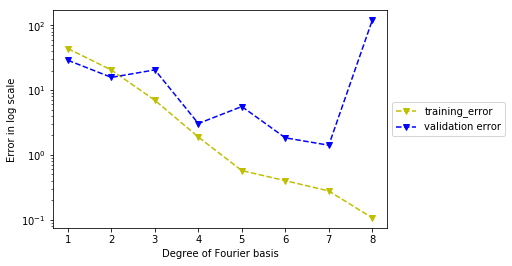

In [12]:
MSE_train, MSE_val = [], []
D = np.arange(1, num_degree+1)
for d in D:
    F_train = fourier_basis(X_train, D=d)
    F_val = fourier_basis(X_val, D=d)
    w = least_square_sol(F_train, y_train)
    MSE_train.append(mean_square_error(w, F_train, y_train))
    MSE_val.append(mean_square_error(w, F_val, y_val))
#     make_plot(D, MSE_train, MSE_val)
print 'The best degree of Fourier basis, in terms of validation error, is %d' % (MSE_val.index(min(MSE_val))+1)
make_plot(D, MSE_train, MSE_val)

# 5_12

The best degree of polynomial basis, in terms of validation error, is 2


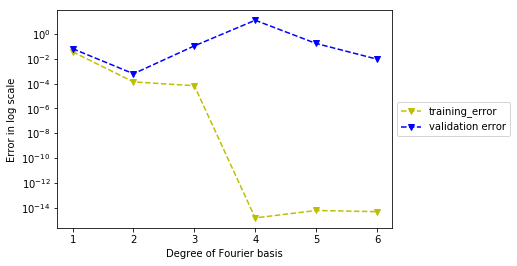

In [14]:
data = pd.read_csv('galileo_ramp_data.csv',names=['x','y'])
X=data['x']
y=data['y']
num_fold, num_degree = 6, 6
folds = random_split(P=y.size, K=num_fold)

MSE_train, MSE_val = [0]*num_degree, [0]*num_degree
D = np.arange(1, num_degree+1)
for f in xrange(num_fold):
    X_train, y_train, X_val, y_val = train_val_split(X, y, folds, fold_id=f)
    for i, d in enumerate(D):
        F_train = poly_basis(X_train, D=d)
        F_val = poly_basis(X_val, D=d)
        w = least_square_sol(F_train, y_train)
        MSE_train[i] += mean_square_error(w, F_train, y_train)/num_fold
        MSE_val[i] += mean_square_error(w, F_val, y_val)/num_fold

print 'The best degree of polynomial basis, in terms of validation error, is %d' % (MSE_val.index(min(MSE_val))+1)

make_plot(D, MSE_train, MSE_val)